In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [29]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day11_11_07_2025\Penguins Species\penguins.csv')

In [30]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.shape

(2240, 29)

In [31]:
X = df.drop("sex", axis = 1)

In [32]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [33]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [37]:
import matplotlib.pyplot as plt

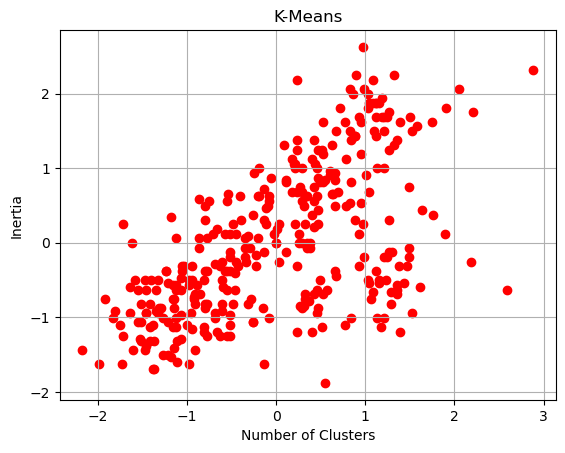

In [39]:
plt.scatter(X_scaled[:,0], X_scaled[:,3], color = 'red')
plt.title("K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 44)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=44)

In [42]:
wcsse = []
for i in range (1, 12):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmean.fit(X_scaled)
    wcsse.append(kmean.inertia_)

In [43]:
wcsse

[1376.0000000000002,
 830.0604771498072,
 486.5846549150417,
 314.12491800950977,
 252.40535903835718,
 184.62368654446703,
 170.60639635277374,
 156.02665841277786,
 143.67508928789408,
 120.1119784618,
 117.12670881335663]

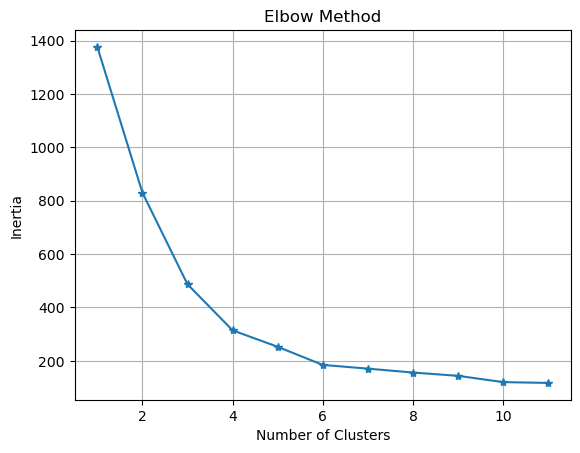

In [44]:
plt.plot(range(1,12), wcsse, marker = '*')
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [45]:
kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 44)
kmeans1.fit(X_scaled)
clusters = kmeans1.predict(X_scaled)

In [46]:
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [47]:
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [48]:
X_scaled['Clusters'] = clusters

In [49]:
#X_scaled_df['Cluster'] = clusters

In [50]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.31971049e+00, -7.83207326e-02],
       [-9.12673368e-01, -1.83843817e-01],
       [-1.41436982e+00, -1.13791992e-01],
       [-1.10432003e-01,  1.25160138e-02],
       [-1.93449122e+00, -4.08036334e-02],
       [-1.85886807e+00,  1.50255014e-01],
       [-1.20800726e+00, -1.85895875e-01],
       [-8.18488138e-01,  1.40818875e-01],
       [-1.86089659e+00, -2.15425139e-01],
       [-6.61636962e-01,  1.81974172e+01],
       [-1.38844620e+00, -2.86835770e-01],
       [-1.12885172e+00, -2.57784440e-01],
       [-1.27598669e+00, -1.92336310e-01],
       [-1.96155529e+00,  2.14436813e-01],
       [-1.87939455e+00, -1.03679354e+00],
       [-1.37046821e+00, -2.10388638e-01],
       [-1.66612806e+00, -2.53924723e-02],
       [-9.15845715e-01,  3.14750321e-01],
       [-2.02529143e+00, -2.23298376e-01],
       [-1.01546228e+00,  4.32990275e-01],
       [-1.61572259e+00, -1.98620314e-01],
       [-1.57085115e+00, -1.21035306e-01],
       [-1.71445540e+00, -5.51752544e-02],
       [-1.

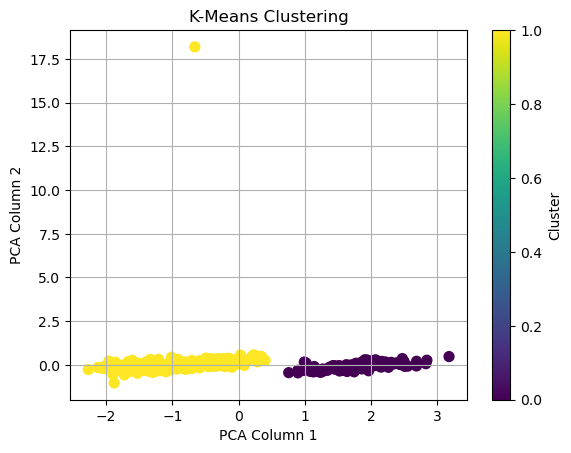

In [53]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters, cmap = 'viridis', s = 50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Column 1")
plt.ylabel("PCA Column 2")
plt.colorbar(label = 'Cluster')
plt.grid(True)
plt.show()